<a href="https://colab.research.google.com/github/OmarGIT9880/Omar-Python-Portfollio/blob/main/indexing_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/gisalgs/notebooks/blob/main/indexing-colab.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Search and Indexing Algorithms


> "I don’t see how he can ever finish, if he doesn't begin."  
>
> <cite>Lewis Carroll, Alice's Adventures in Wonderland</cite>

> "Begin at the beginning," the King said, very gravely, "and go on till you come to the end: then stop."
>
> <cite>Lewis Carroll, Alice's Adventures in Wonderland</cite>


An **algorithm** is a process that contains a set of well designed steps for calculation. For example, we can design a process to tell that, given any integer, what is the next odd number. The word algorithm is from latin _algorismus_, which is from _al-Khwa-rizmī_, a Persian mathematician, astronomer, and geographer. There are two aspects to evaluate an algorithm: its **correctness** and **time complexity**. We focus on the latter here. Time complexity is also called running time, though the term "running" is not accurate because we are not really talking about how the algorithm actually runs but in theory how the computation grows with the problem size. The goal of this tutorial is to explain the fundamental concepts of time complexity. There will be four short videos associated this tutorial. They are listed below and will also be referred to in the tutorial.

- [Linear search and its time complexity](https://mediasite.osu.edu/Mediasite/Play/d52ce052ccd1434cbcdead898a4152f11d)
- [Building a binary tree](https://mediasite.osu.edu/Mediasite/Play/1d687e1028db46b8a91ba03907469b3d1d)
- [Explanation of the code](https://mediasite.osu.edu/Mediasite/Play/e53cebfcb78d4724a95833f1fe0e1fda1d)
- [Search and time complexity using a balanced binary tree](https://mediasite.osu.edu/Mediasite/Play/49e879bba34e48d1b8ad04befa4d13271d)


A commonly used type of algorithms is **search**. For example, if we have a database of cities, we may want to find if a city is in the database so that we can pull information for that city. Search comes in different shapes and here we are going to generalize such tasks as searching for one dimensional information as represented using a series of numbers. These numbers can be considered as the IDs of some entities. In later part of this module we will explore how multiple dimensions in the data (such as points in spatial data) can be utilized for search.

## Linear search and time complexity

The simplest form of search is called **linear search**, which is a process that goes through all the items in our data and the search will stop when we either find the item we are searching for or we reach the end of all the items. Let us assume we have a list of numbers named `nums` (e.g., `nums = [1, 2, 9, 12, 15, 29, 32, 91, 4, 11]` or `nums = [1, 2, 3, 4, 5, 6, 7]`) and we want to find if number `j` (any number) is in the list. The following is the linear search algorithm:

***
```
for each number i in nums
    if i is as same as j
        return i and stop
```
***



A similar linear search algorithm can be used upon a list of point called `points` where we want to find if point `p` is in the list.

***
```
for each point p in list points
    if p is as same as p0
        return p and stop
```
***

To understand the time complexity of linear search, let's assume

* Getting a number (or point) out of the list takes $c_1$ time (line 1)
* Comparing if two numbers (points) are the same takes $c_2$ time (line 2)
* Returning the result takes $c_3$ time (line 3)
* $c_1$, $c_2$, and $c_3$ are constants
* There are $n$ numbers (points) in the list

What is the total time needed for the above linear search algorithm? Here are some points to think about:

* There are best cases and worst cases
* In the worst case scenario, $c_1$ and $c_2$ will be run up to $n$ times, and $c_3$ will be run once
* Therefore the total time is $c1 \times n + c2 \times n + c3$
* In average, we will take $c1 \times n/2 + c2 \times n/2 + c3$, which can be generalized as $(n \times b + c)$, where $b = (c1+c2)/2$


We don't really care much about $b$ and $c$ -- they are constant and are always relatively small. But the value of n tells how running time **grows** with the data. We use a growth function to tell the running time. More specifically, if we know there is a definitive upper bound of the running time, we use a **Big-O** notation to denote the growth. In the case of the linear search algorithm, we have a running time of $O(n)$. The above algorithm is called **linear search** for a reason: the time used is linear to the size of input.

**Video:** There is a [video](https://mediasite.osu.edu/Mediasite/Play/d52ce052ccd1434cbcdead898a4152f11d) that explains some of the above concepts. We only touch the Big-O notation in its simplest form and more details can be found in multiple sources such as at [Khan academy](https://www.khanacademy.org/computing/computer-science/algorithms/asymptotic-notation/a/big-o-notation) and at the [wikipedia page](https://en.wikipedia.org/wiki/Big_O_notation).

Next we will empirically show what it means "linear" in the above discussion.

In [ ]:
import random
import time
import math

%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
time.time()

1762710903.2630308

In order to improve the "user experience" when we conduct the experiments, we want to have a nice way of showing the progress: it can be stressful to test a million iterations without knowing where we are and how long we have to wait. We do this with a progress bar. There are many ways to make a progress bar in Python interactive environment (including this one) and some of them can be found at [this stackoverflow page](https://stackoverflow.com/questions/3160699/python-progress-bar). But we only need a very simple one without having to involve too complicated techniques. We use a special character `'\r'` that forces the cursor to move to the beginning of each line (so called carriage return) when we use the `print` function. [This github page](https://github.com/googlecolab/colabtools/issues/166) suggests using the carriage return at the beginning of the string instead of in the end character. We will need to make sure the next string to print is at least as long as the previous one. Otherwise, part of the previous print will remain on screen because it is not covered by the new one. Sometimes we can add some spaces at the end to make sure nothing noticeable is shown.

In [ ]:
n = 15
for i in range(n+1):
    barx = int(20*(i)/n) # bar is 20 char length
    print(f"\r[{'x'*barx}{'-'*(20-barx)}] {i}/{n}", end='', flush=True)
    time.sleep(0.1)

[xxxxxxxxxxxxxxxxxxxx] 15/15

The above test sounds all we need. If we really want, we can replace the 'x' with a special character of block. But it is not necessary. Now, we make a function so it is easy to use. It is necessary to note that some Python or iPython environments accept an f-string in single quotes where the strings in placeholders (braces) are also in single quotes. But to be safe, we use double quotes for the f-string and single for the strings inside placeholders.

In [ ]:
def very_simple_progress_bar(current, n, size=20):
    '''
    current    an integer indicating the current step
    n          an integer indicating the number of iterations (inclusive)
    size       the length of the progress bar

    We assume the lower end is zero.
    '''
    barx = int(size*(current)/n)
    print(f"\r[{'x'*barx}{'-'*(size-barx)}] {current}/{n}", end='', flush=True)

In [ ]:
n = 15
for i in range(n+1):
    very_simple_progress_bar(i, n)
    time.sleep(0.1)

[xxxxxxxxxxxxxxxxxxxx] 15/15

We now test the linear search method on 100 different data sets. The sizes of these data sets range from 100,000 to 10,000,000, with an interval of 100,000.

In [ ]:
target = 0.556
times = []
upper = 100
multiple = 100000

for i in range(1, upper+1):
    very_simple_progress_bar(i, upper)
    i *= multiple
    nums = [random.uniform(0, 10) for _ in range(i)]
    t1 = time.time()             # get start time
    for num in nums:             # linear search
        if num == target:        #
            break                #
    t2 = time.time()             # get end time
    times.append(t2-t1)          # record total time for this search

[xxxxxxxxxxxxxxxxxxxx] 100/100

Now we present evidence of why this type of search is called linear search:

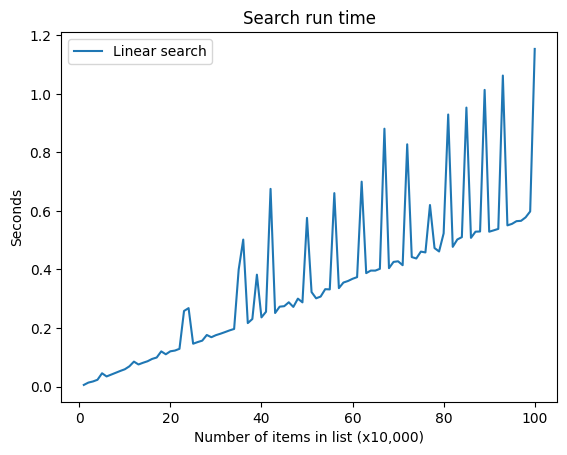

In [ ]:
plt.plot(range(1, upper+1), times, label='Linear search')
plt.legend(loc='upper left')
plt.xlabel('Number of items in list (x10,000)')
plt.ylabel('Seconds')
plt.title('Search run time')
plt.show()

## Beyond linear search: a divide-and-conquer approach using binary search

Linear search works, but it should not be considered as efficient. It can be the last resort if we don't have other ways to find useful info. In many cases, we do have other ways. Think about how we use the physical dictionary or the index of a book: we rarely start from the very beginning. Instead, we use a mechanism called divide-and-conquer. We are going to explore this mechanism here and then we will see how we can develop a data structure (called a tree) to naturally facilitate this. In this part of the tutorial, we will also encounter some nuances of Python as a programming language.

We first get a lot of random points. Here we simply use a list of two numbers as a point. Later in this class we will use the Point class.

In [ ]:
nums = [random.uniform(0, 10) for _ in range((upper-1)*multiple)]
len(nums)

9900000

The `in` operator in Python does not assume the items in a list are ordered and can be treated as [a linear search](https://stackoverflow.com/questions/13884177/complexity-of-in-operator-in-python) in general. Though later we will see there is a lot going into this.

In [ ]:
%%time
t1 = time.time()
target in nums
t2 = time.time()
print(t2-t1)

0.13437318801879883
CPU times: user 136 ms, sys: 54 µs, total: 136 ms
Wall time: 135 ms


Previously we record the computing time using the `time` module. By putting this in a function, we can report the time used in a more nuanced way. If we just want to see how much time is used by the code in a cell, we can use what is called a **cell magic** command in Jupyter notebook to do this. There are two kinds of magic commands. The first one is called a line magic. We have seen this a lot when we use the following

```
%matplotlib inline
```

to force the output (graphics) of matplotlib to be embedded in the document. A line magic is effective only for that line. But a cell magic will do something for the entire cell and we only use the following to get the time used by the code in the cell:

```
%%time
```

This is what we get in the above cell.

This is not bad at all! It is better than the one we got from our own test. There is a reason to that, but we will get back to this later. We now reshuffle the list. We don't just randomly reshuffle it. We actually sort it;

In [ ]:
nums.sort()

Now we try the same `in` operator and see if it gets faster.

In [ ]:
%%time
target in nums

CPU times: user 652 ms, sys: 3.07 ms, total: 655 ms
Wall time: 651 ms


False

So sorting doesn't seem to help. Even though we use the exact same code  (using the `in` operator), the performance getting a lot worse. In Python, this issue is called cache misses, which has something to do with how Python lists are implemented. But we are not going to get into too this here (there is a lot of discussion on this on the web).

## Binary search: two implementations

Now, let's take the sorted list and see if we can devise a new search mechanism like we use the dictionary: we start from somewhere in the middle. If the number to find is greater than the one in the middle, we only need to search for the half where all is smaller than the target. This mechanism is called **divide-and-conquer** in general, and in our specific case, it is called **binary search** because we continuously divide the numbers to be searched into two halves and only focus on one of the two halves. Our first shot at this idea is based on the use of list slicing and we can use the following pseudo code to describe the process:

```
while data:
    mid = len(data)/2
    if data[mid] == target:
        break
    if the data item in the middle is smaller than target:
        set data to the first half of itself (excluding self)
    else:
        set data to the second half of itself (excluding self)
```

Below is the implementation. Again, we must make sure data is **sorted** in an ascending fashion. In our case, if all the cells are run sequentially, the list `nums` should be sorted. In order to avoid changing the content of the original list, we make a copy of it and work on the copy.

In [ ]:
%%time

import copy
to_search = copy.copy(nums)
target = random.sample(to_search, 1)[0] * 100

# TODO:
#
# Write a while loop to continuously divide the numbers to be searched into a half.
# If the target is as same as the item in the middle, stop.
# If the target is smaller than the middle, use the left half (excluding the one in middle) for the next iteration.
# Otherwise, use the right half for the next iteration.
#

while to_search:
  mid = len(to_search)//2
  if target == to_search[mid]:
    print ('found')
    break
  if target < to_search[mid]:
    to_search = to_search[:mid]
  else:
    to_search = to_search[mid+1:]




CPU times: user 1.53 s, sys: 95 ms, total: 1.63 s
Wall time: 1.67 s


So, the code works. But is it embarrassing that the divide-and-conquer method is even worse than the use of the `in` operator?  The `in` operator is supposed to be a brute-force linear search even when the list is sorted (the operator doesn't check if the list is sorted or not). It might be because the Python built-in stuff has some secrete way that can perform better, and our implementation of the binary search above is not optimal at all. The way we continuously reassign the sliced list to `to_search` is indeed expensive in terms of computing time.

It is possible to write a more efficient program. As hinted above, our original divide-and-conquer method is held back by the use of slicing and assignment statements. The code below doesn't go that rout. Instead, we dynamically calculate the range of the numbers that must be checked out. Anything outside that range can then be ignored.

In [ ]:
%%time

# TODO
#
# Rewrite the divide-and-conquer so that we calculate the start and end positions
# for the next round of search in every iteration.
#


start = 0
end = len(nums)
target = random.sample(nums, 1)[0]
target = nums[-1] + 0.000001

while not start == end:
  mid = start + (end-start)//2
  if target == nums[mid]:
    print ('found')
    break
  if target < nums[mid]:
    end = mid
  else:
    start = mid+1




CPU times: user 80 µs, sys: 0 ns, total: 80 µs
Wall time: 83.9 µs


We should be very proud of the above code! It absolutely outperforms the Python built-in operator, and of course everything else we have tried so far. Yes, we know the `in` operator does not use the divide-and-conquer mechanism as we use here in the above code. But, we are able to show that a right implementation of the divide-and-conquer is light years ahead of the linear search, regardless whether it is a built-in or implemented by ourselves. We are so proud that we want to make a function of this.

In [ ]:
# TODO:
#
# Convert the code above into a function
def search_list_binary(data, target):
    '''data must be sorted ascendingly'''
    start = 0
    end = len(data)
    while not start == end:
        mid = start + (end-start) // 2
        if target == data[mid]:
            return True
        elif target < data[mid]:
            end = mid
        else:
            start = mid+1
    return False

# target = 0.556
t1 = time.time()
print(search_list_binary(nums, target))
t2 = time.time()
t2 - t1

False


0.00019812583923339844

Now, we do the same experiments of searching the target in lists with different sizes. We use the new binary search function this time.

In [ ]:
target = 0.556
times2 = []
lower = 1
upper = 100
multiple = 100000

for i in range(lower, upper+1):
    very_simple_progress_bar(i, upper)
    n = i * multiple
    nums = [random.uniform(0, 10) for _ in range(n)]
    nums.sort()
    t1 = time.time()
    search_list_binary(nums, target)
    t2 = time.time()
    times2.append(t2-t1)

[xxxxxxxxxxxxxxxxxxxx] 100/100

The following code should show the astonishing gain in computation time using our new search algorithm (note the scale of the time axis).

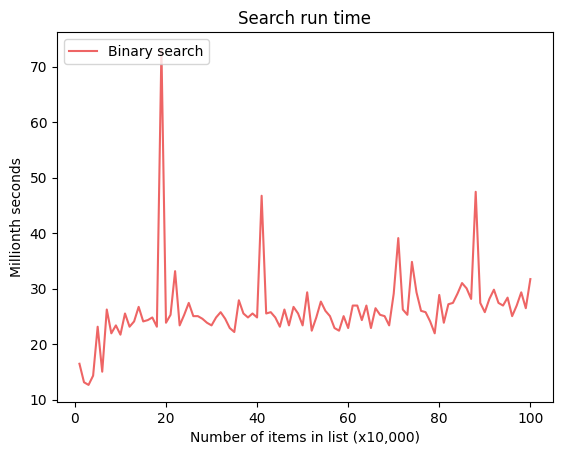

In [ ]:
times_1m = [t*1000000 for t in times2]
plt.plot(range(lower, upper+1), times_1m, color='#ee6565', label='Binary search')
plt.legend(loc='upper left')
plt.xlabel('Number of items in list (x10,000)')
plt.ylabel('Millionth seconds')
plt.title('Search run time')
plt.show()

So we have seen time complexity of a linear search and that of binary search. More details will be discussed later. Before we move to the topic of developing a data structure to facilitate binary search, we should take a look at a search algorithm with quadratic time complexity.

## Quadratic time complexity

Using the same logic, we can analyze the impact of $n$ on the running time of the following algorithm of finding the shortest pairwise distance in a list of points. This algorithm is not linear. It has a quadratic running time of $O(n^2)$.

***
```
let mindist be a very large number
for each point p1 in points:
    for each point p2 in points:
        if p1 is not p2:
            let d be the distance between p1 and p2
            if d < mindist:
                mindist = d
return mindist and stop
```
***





## Search using a tree structure

What we have explored so far is to **search** for something useful from a set of data. The binary search algorithm is efficient. What is its time complexity (running time)? To answer this, we are not going to look at the algorithm per se. Instead, we are going to construct a particular data structure using a tree metaphor and we will demonstrate it is equivalent to the divide-and-conquer approach when we have a systematic way to search using the tree structure.

Let's consider what will happen if we re-arrange the data in the original list into a special tree structure as illustrated below:

<img src="https://github.com/gisalgs/notebooks/blob/main/figures/trees-2.png?raw=1" width=300/>

Before we actually do the analysis, let's first introduce some key concepts of indexing and binary tree; we will then write some code to test these concepts. The idea of indexing is a huge topic and Donald E. Knuth designated a whole volume to this topic (Volume 3: Sorting and Searching) in his classic series titled *The Art of Computer Programming*. We will only touch the most basic ideas in this scope as a preparation for spatial indexing methods.

Trees are an important means to organizing data. A **tree** contains multiple **nodes** where each node can have **child nodes** and **parent nodes**, except for the **root** node that does not have parent nodes and **leaf nodes** that do not have child nodes. The linkages between nodes are called the **edges**. The root serves as the access point to the entire tree. The tree illustrated above represents the sequence of numbers ranging from 1 to 7 in a **binary** fashion where each node can have up to two child nodes, and for each given node, the number that is smaller will be placed on the left child node and otherwise on the right child node.

An important feature of trees is that they are structured so that we can conduct a **divide-and-conquer** approach to searching for information. Using a binary tree for example we can perform a **binary search** by excluding the nodes on one side of each node (starting at the root) and therefore expedite the search process. However, the trees for the same data can be constructed differently and one way to measure their difference is to count the number of edges one has to pass from the root to the leaf nodes.

On of the interesting issues of using a tree structure is that the same data (numbers here) can be used to construct different trees, and here are two examples:

<img src="https://github.com/gisalgs/notebooks/blob/main/figures/trees-1.png?raw=1" width=450/>


Which tree is "better" then? To answer this question, we need to introduce a few terminologies. The **depth** of a node is the number of edges on the path from the root to that node. The depth of the root is 0. There is at least a leaf node on the tree that has the deepest (with the highest number of edges) from the root, and we call this depth the **height** of the tree. The ideas of depth and height can also be looked at from the perspective of each node (we just pretend the node is the root and concentrate on all the child nodes from that node). This is what we call a **subtree**, formed by a node and all its child nodes.

Every node on a tree has two subtrees, left and right. This leads to the definition of a **balanced tree**: a tree where the difference in the heights of the left and right subtrees of *any node* is no more than 1. A wordier way to say the same, but using the term depth, is this: a balanced tree is a tree where the difference in the depths of the deepest leaf nodes in the left and right subtrees of *any node* is no more than 1. To this definition (there are different definitions too), the above two tree are not balanced, but the first tree is.

Given a sequence of numbers, we can build a binary tree from scratch. We use the first number as the root and the next number will be the left child node of the root if it is smaller than the toot, or the right if greater. The process continues until all numbers are included in the tree. [**This video**](https://mediasite.osu.edu/Mediasite/Play/1d687e1028db46b8a91ba03907469b3d1d) explains the process.

## <font color="red">Exercises</font>

We will first reshuffle 12 integers so they are in a random order. Then we will create a binary tree using this randomly ordered list of numbers, both manually and using our code. Finally we examine the time complexity of using this binary tree. To do all of these, let's make sure we can run the following code cell, which should produce the reshuffled list for us.


In [ ]:
import random

In [ ]:
test_nums = list(range(12))
random.shuffle(test_nums)
print(test_nums)

[2, 10, 9, 11, 6, 4, 8, 7, 5, 3, 1, 0]


Use the numbers printed out from the above code to manually build a binary tree. Make sure to use the numbers in the printout sequentially with the one on the left being the first. We will do this in class on a paper. Make sure to include both the numbers and the tree on the paper. Scan your paper and submit it as an image to **Exercises - module 3.1 on paper**.


## Coding Binary Trees

**Video:** Refer to [this video](https://mediasite.osu.edu/Mediasite/Play/e53cebfcb78d4724a95833f1fe0e1fda1d) for this part. Please note that the code here is not complete. Use the github repository to download the complete code (details later).

We write a class to store the most fundamental concept in a tree: its nodes. Each **node** has three members: data that stores whatever information we want to store for the tree, and the left and right child nodes of each node. We can store "whatever" information in the data member, but we have an important assumption: we must be able to conduct **comparison** between such data. Numbers are naturally in the category because we know how to compare them. For other type of data, we must override the logic operators to make sure comparison can be done (see an example of the Point class we discussed in the previous section of this class).


```python
class node():
    def __init__(self, data, left, right):
        self.data = data
        self.left = left
        self.right = right
    def __repr__(self):
        return str(self.data)
```

In the `__repr__` method, we simply recast the data into a string, which requires the `__repr__` method for the data to be handy (note we have this for the Point class).

There may be a need to write a class for the tree too. But here we take a shortcut by using the root as the tree -- the only way we access a tree is to go to its root. With that, we discuss the most important operation for trees: insertion. There are different ways to insert a node. For example, we can insert a new node to between two nodes, or we can always insert child nodes to leaf nodes. We use the latter approach here. To do so, however, we will need to be able to find the appropriate leaf node. We write a function called **search_bt** for this purpose. This is a **recursive** function since we can continuously call this function until we reach a leaf node.

```python
def search_bt(t, d, is_find_only=True):
    if t is None:
        return
    if t.data == d:
        if is_find_only:
            return t
        else:
            return
    if d < t.data:
        next = t.left
    else:
        next = t.right
    if is_find_only==False and next is None:
        return t
    return search_bt(next, d, is_find_only)
```

In the above function, we use something extra to make it more general than just finding the information. The Boolean variable `is_find_only` specifies whether the search is to find the value (True) or to find the immediate parent node of the value that is not present in the tree (False). The latter case is useful when we try to decide where to put a new node — it must be the node that is the immediate parent node of the new node.

With that, the **insert** function becomes straightforward: we first find the node to which the new node should be inserted as a child node and then make it as either the left or right child node of that node.


```python
def insert(t, d):
    n = search_bt(t, d, False)
    if n is None:
        return
    n0 = node(d, left=None, right=None)
    if d < n.data:
        n.left = n0
    else:
        n.right = n0
```

Now, we get to use the functions to create a tree. To make things simple, we actually write a function called `bt` that creates the tree and returns the root of the tree. It should be noted that the first item in the data will be used as the root of the tree. Not ideal (since no guarantee of a balanced tree), but we will use it for this class. And then we write another function to print out the content in the tree in the order the data is sorted.

```python
def bt(data):
    root = node(data=data[0], left=None, right=None)
    for d in data[1:]:
        insert(root, d)
    return root

def bt_print(t):
    if t.left:
        bt_print(t.left)
    print(t)
    if t.right:
        bt_print(t.right)
```

## Putting it together

We put all the code described above into a file called [bst.py](https://github.com/gisalgs/indexing/blob/master/bst.py) that is available in a github repository called **indexing**. To use the module locally, we can save it in a folder called **indexing** under our root folder (this is at the same level as our previous folder geom). Don't forget to create an empty file called `__init__.py` in the indexing folder. The we can use it like this:

```python
import sys
sys.path.append('/home/xiao/lib/gisalgs')
from indexing.bst import *
```

In this tutorial, we will run our code from colab. We first clone the repository:

In [ ]:
!rm -rf indexing
!git clone https://github.com/gisalgs/indexing.git

Cloning into 'indexing'...
remote: Enumerating objects: 180, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 180 (delta 2), reused 0 (delta 0), pack-reused 170 (from 1)
Receiving objects: 100% (180/180), 61.16 KiB | 10.19 MiB/s, done.
Resolving deltas: 100% (94/94), done.


and then import the necessary modules:

In [ ]:
from indexing.bst import *
import random

We will first create a tree by inserting the numbers in a sorted order.

In [ ]:
data = range(9 , -1 , -1)
list(data)

[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

In [ ]:
t = bt(data)

In [ ]:
t.left.left

7

We can explicitly navigate the tree by calling the left and right nodes, starting from the root.

In [ ]:
t.left

8

In [ ]:
t.right

There is a function called `bt_print` in the [`bst`](https://github.com/gisalgs/indexing/blob/master/bst.py) module and it can be used to print out the nodes in the tree in a certain order.

In [ ]:
bt_print(t)

0
1
2
3
4
5
6
7
8
9


### Printing the tree

Though `bt_print` can give us some information about the tree, it is not intuitive. It would be nice if we can actually print out the "tree" itself. Doing so is not difficult, though quite tedious. There is a Python program available from the MIT OpenCourseWare web site at [here](http://ocw.mit.edu/courses/electrical-engineering-and-computer-science/6-006-introduction-to-algorithms-fall-2011/readings/binary-search-trees/bst.py). This program is included as a function called `tree_print` in the module called [`bst.py`](https://github.com/gisalgs/indexing/blob/master/bst.py). This function takes an input argument that is simply the root node of a tree.

In [ ]:
tree_print(t)

         9 
         /\
        8  
        /\ 
       7   
       /\  
      6    
      /\   
     5     
     /\    
    4      
    /\     
   3       
   /\      
  2        
  /\       
 1         
 /\        
0          
/\         


### Searching a tree

Now we can search for information from the trees.

In [ ]:
search_bt(t, 10)
#print(search_bt(t, 10))

Then we are going to reshuffle the data and make another tree.

In [ ]:
data = list(range(10))
random.shuffle(data)
t1 = bt(data)
tree_print(t1)

    __4__      
   /     \     
  1_     6_    
 /  \   /  \   
0   3  5    8  
/\  /\ /\  / \ 
   2      7  9 
   /\     /\ /\


The above tree was not balanced, even after many tries. Later in this class we will discuss how to balance a binary tree like this.

Before we move on, let's think about the size of the tree. More specifically, <font color="red">what is the smallest height of a tree that can store 10 (or any number of) values?</font>

The smallest height of a tree that can store 10 values is 3. A full binary tree can store 2^H+1 - 1 nodes. Since 2^4 - 1 = 15 ≥ 10. The minimum height H = 3.

## More on time complexity

**Video** Refer to [this video](https://mediasite.osu.edu/Mediasite/Play/49e879bba34e48d1b8ad04befa4d13271d) for this part.

So what is the time complexity (or running time) for a binary search algorithm as in `search_bt`? Let's first examine the algorithm it self. We use the following pseudo code to do this and we assume the root of the binary tree is denoted as `t` when the algorithm starts.

***
```
while t is not empty:
    let p be the data at node t
    if p is as same as d:
        return p and stop
    if d < p:
        t = the left child node of t
    else:
        t = the right child node of t
```
***

The while loop at the beginning of the algorithm actually controls the total running time. What controls the number of loops then? It is the height of the tree and we can certainly calculate the **height** of the tree given two factors: the number of data items to be stored in the tree, and whether the tree is balanced. If the difference between the heights of all leaf nodes is no more than 1, we say the tree is **balanced**. A perfectly balanced tree with a height of $H$ will be able to hold a total of $2^0 +2^1 +2^2 +...+2^H = 2^{H+1}−1$ items. In other words, if we have $n$ items that need to be indexed using a balanced tree, the height of that tree is of the order of, again using the Big-O notation,  $O(\log_2n)$, which is also the running time of search using that tree. This is a significantly more efficient way of search with a **logarithmic time complexity**.

More details about the time complexity analysis are in **Section 1.1** in _GIS Algorithms_.


## <font color="red">Exercises</font>

Now we should be able to answer questions like this: what is the minimum height of a balanced binary tree to hold 100 nodes? We need to find the smallest $H$ value so that $2^{H+1}-1$ is greater than 100.

**Write your answer directly below in this cell.** If you need to use Python code to get the answer, add code cell below. But you need to explicitly state our answer in this cell.


The minimum height of a balanced binary tree that can hold 100 nodes is 6, becuase 2^7 - 1 = 127 > 100 and 2^6 - 1 = 63 < 100.

## <font color="red">Exercises</font>

Can a fully balanced binary tree with a height of 101 be used to include a quadrillion nodes in this tree? A quadrillion is 1000 trillion.

**Write your answer directly below in this cell.** If you need to use Python code to get the answer, add code cell below. But you need to explicitly state our answer in this cell.



Yes. A height-101 full binary tree can hold 2^102 - 1 nodes, which is about 5 x 10^30, far more than a quadrillion (10^15).

## <font color="red">Exercises</font>

Use the Python code introduced in this tutorial to create a binary tree based on random numbers from the reshuffled numbers (i.e., the numbers in list `test_nums`). Then use the `tree_print` function to print the tree. The tree printed out should look exact the same as the manually created one. Use the code cell below to answer this question. Make sure you run the code.


In [ ]:
# TODO: write your code here to answer the above question,
#       using the numbers in test_nums

print('The numbers are', test_nums)
t = bt(test_nums)
tree_print(t)

The numbers are [9, 11, 6, 2, 1, 8, 3, 10, 7, 0, 5, 4]
        __9___  
       /      \ 
    __6___    11
   /      \   /\
   2      8  10 
  / \     /\ /\ 
 1   3   7      
 /\ / \  /\     
0     5         
/\    /\        
     4          
     /\         
